<a href="https://colab.research.google.com/github/madhurapi/Recommender-System/blob/main/1_text_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


In [ ]:
# import nltk
# nltk.download()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# importing modules
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()
 
sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)
 
for w in words:
    print(w, " : ", ps.stem(w))

Programmers  :  programm
program  :  program
with  :  with
programming  :  program
languages  :  languag


# Reading Raw data

In [ ]:
import pandas as pd
import re
import string
import nltk

In [ ]:
data = pd.read_csv('train_data_cleaning_disaster_tweets.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [ ]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [ ]:
data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [ ]:
# import natural language toolkit
# import nltk
# nltk.download('stopwords')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

# Text Cleaning

In [ ]:
def clean_text(txt):
    txt = ''.join([c for c in txt if c not in string.punctuation])#removing punctuations
    tokens = re.split('\W+', txt)#stopwords
    txt = [ps.stem(word) for word in tokens if word not in stopwords]# other than stopwords
    return txt

# Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
corpus = ['This is a sentence about text mining in Data Science',
          'which is trending in information retrievel systems']

X = cv.fit(corpus)
print(X)

CountVectorizer()


In [ ]:
print(X.vocabulary_)#dictionary of words consisting the words and index number
# no words such as 'a'

{'this': 11, 'is': 4, 'sentence': 8, 'about': 0, 'text': 10, 'mining': 5, 'in': 2, 'data': 1, 'science': 7, 'which': 13, 'trending': 12, 'information': 3, 'retrievel': 6, 'systems': 9}


In [ ]:
print(cv.get_feature_names())#list of token words

['about', 'data', 'in', 'information', 'is', 'mining', 'retrievel', 'science', 'sentence', 'systems', 'text', 'this', 'trending', 'which']


C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X= cv.transform(corpus)#for calculating document term matrix converting the corpus into matrix
print(X)#positional

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (1, 9)	1
  (1, 12)	1
  (1, 13)	1


In [ ]:
print(X.shape)# 1 single sentence hence 1 row, 14 unique token words corresponds to columns

(2, 14)


In [ ]:
print(X.toarray())

[[1 1 1 0 1 1 0 1 1 0 1 1 0 0]
 [0 0 1 1 1 0 1 0 0 1 0 0 1 1]]


In [ ]:
df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

   about  data  in  information  is  mining  retrievel  science  sentence  \
0      1     1   1            0   1       1          0        1         1   
1      0     0   1            1   1       0          1        0         0   

   systems  text  this  trending  which  
0        0     1     1         0      0  
1        1     0     0         1      1  


# Count vectorizer on dataset

In [ ]:
cv1 = CountVectorizer(analyzer = clean_text)

X1 = cv1.fit_transform(data['text'])
print(X1.shape)

(7613, 13864)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity1 = cosine_similarity(X1)

In [ ]:
similarity1

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.06741999,
        0.09534626],
       [0.        , 0.        , 0.        , ..., 0.06741999, 1.        ,
        0.06428243],
       [0.        , 0.        , 0.        , ..., 0.09534626, 0.06428243,
        1.        ]])

In [ ]:
print(cv1.get_feature_names())

['', '0', '00', '000', '0000', '00end', '00pm', '01', '02', '0215', '03', '030', '033', '034', '039', '04', '05', '05th', '06', '060', '061', '06jst', '07', '08', '0840728', '0853', '087809233445', '0880', '09', '0l', '0npzp', '1', '10', '100', '1000', '10000', '100000', '1008pla', '1008planet', '100bn', '100mb', '100nd', '101', '1017', '1023', '1028', '103', '105', '106', '1061thetwist', '107', '109', '10am', '10k', '10km', '10m', '10new', '10pm', '10th', '10w', '10x', '11', '11000', '11000000', '111020', '114', '1141', '1145', '115', '115film', '119000', '11am', '11th', '12', '1200', '12000', '120000', '1200000', '1236', '124', '125', '129', '12am', '12hr', '12jst', '12m', '12mm', '12new', '12pm', '12th', '12u', '12v', '13', '130', '13000', '133', '138', '139055', '13pm', '14', '140', '14000', '14028', '141', '143', '148', '149', '14th', '15', '150', '1500', '15000270364', '15000270653', '158', '159', '15901', '15km', '15moferadio', '15p', '15pm', '15t', '15th', '16', '160', '1600', 

C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data_sample = data[0:10]
data_sample
cv2 = CountVectorizer(analyzer = clean_text)

X2 = cv2.fit_transform(data_sample['text'])
print(X2.shape)

(10, 75)


In [ ]:
df = pd.DataFrame(X2.toarray(),columns = cv2.get_feature_names())
df.head()

,,13000,20,across,afraid,alaska,all,allah,area,ask,...,smoke,spring,street,there,top,tornado,updat,us,wildfir,wood
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# count vectorizer done on dataset

# TF - IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
corpus = ['This is a sentence about text mining in Data Science',
          'which is trending in information retrievel systems']

X3 = tfidf.fit(corpus)
print(X3)
print(X3.vocabulary_)
print(tfidf.get_feature_names())

X3= tfidf.transform(corpus)
print(X3.shape)
print(X3.toarray())

df3 = pd.DataFrame(X3.toarray(),columns = tfidf.get_feature_names())
df3.head()


TfidfVectorizer()
{'this': 11, 'is': 4, 'sentence': 8, 'about': 0, 'text': 10, 'mining': 5, 'in': 2, 'data': 1, 'science': 7, 'which': 13, 'trending': 12, 'information': 3, 'retrievel': 6, 'systems': 9}
['about', 'data', 'in', 'information', 'is', 'mining', 'retrievel', 'science', 'sentence', 'systems', 'text', 'this', 'trending', 'which']
(2, 14)
[[0.35327777 0.35327777 0.25136004 0.         0.25136004 0.35327777
  0.         0.35327777 0.35327777 0.         0.35327777 0.35327777
  0.         0.        ]
 [0.         0.         0.29017021 0.4078241  0.29017021 0.
  0.4078241  0.         0.         0.4078241  0.         0.
  0.4078241  0.4078241 ]]


C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about,data,in,information,is,mining,retrievel,science,sentence,systems,text,this,trending,which
0,0.353278,0.353278,0.25136,0.000000,0.25136,0.353278,0.000000,0.353278,0.353278,0.000000,0.353278,0.353278,0.000000,0.000000
1,0.000000,0.000000,0.29017,0.407824,0.29017,0.000000,0.407824,0.000000,0.000000,0.407824,0.000000,0.000000,0.407824,0.407824


# TF-IDF on dataset

In [ ]:
data_sample = data[0:10]
data_sample
tfidf2 = CountVectorizer(analyzer = clean_text)

X4 = tfidf2.fit_transform(data_sample['text'])
print(X4.shape)

(10, 75)


In [ ]:
df4 = pd.DataFrame(X4.toarray(),columns = tfidf2.get_feature_names())
df4.head()

C:\Users\madhu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,13000,20,across,afraid,alaska,all,allah,area,ask,...,smoke,spring,street,there,top,tornado,updat,us,wildfir,wood
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#Trend of the flight per day
import seaborn as sns
# sns.barplot(x= 'tornado',data=df4, palette='plasma').set(title='barplot for a word')

In [ ]:
# import matplotlib

<AxesSubplot:xlabel='tornado', ylabel='count'>

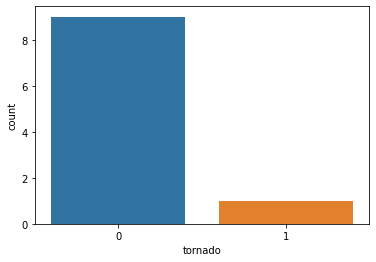

In [ ]:
sns.countplot(x = 'tornado',data = df4)

<AxesSubplot:ylabel='count'>

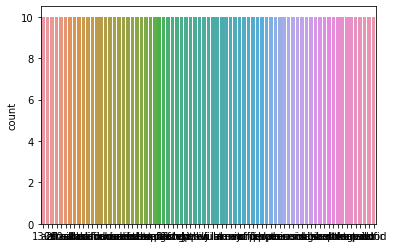

In [ ]:
sns.countplot(data =df4)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(X4, X4)